#**Gangadhar S Shiva Assignment 2**

**Dataset: Climate Fever DatasetLinks to an external site.**



**Download the Climate Fever dataset from Kaggle using the link above.**

**Install the necessary libraries for NLP in Python, such as NLTK, Spacy, or any other library of your choice.**

**Load the dataset into your Python environment and preprocess the data as needed (e.g., remove unnecessary characters, tokenize, etc.).**


**Apply NER techniques to identify named entities (such as persons, organizations, locations, etc.) within the text.**

**Implement PoS tagging to assign appropriate parts of speech to different words in the text.**

**Analyze the results and provide insights on the named entities and their corresponding parts of speech in the Climate Fever dataset.**

**Visualize the findings using appropriate graphs, charts, or tables to enhance understanding.**

**Summarize your approach, the findings, and any challenges faced during the process.**


#**Download the Climate Fever dataset from Kaggle using the link above.**

Install the necessary libraries for NLP in Python, such as NLTK, Spacy, or any other library of your choice.

Load the dataset into your Python environment and preprocess the data as needed (e.g., remove unnecessary characters, tokenize, etc.).

In [ ]:
from google.colab import drive
import pandas as pd

# Mount Google Drive
drive.mount('/content/drive')

# Define the path to the dataset
dataset_path = '/content/drive/MyDrive/Colab Notebooks/AAI20/assignment-2/climate-fever.csv'

# Load the dataset into a pandas DataFrame
try:
    df = pd.read_csv(dataset_path)
    print("Dataset loaded successfully!")
    display(df.head()) # Display the first few rows to verify
except FileNotFoundError:
    print(f"Error: Dataset not found at {dataset_path}")
except Exception as e:
    print(f"An error occurred: {e}")

Mounted at /content/drive
Dataset loaded successfully!


,claim_id,claim,claim_label,evidences/0/evidence_id,evidences/0/evidence_label,evidences/0/article,evidences/0/evidence,evidences/0/entropy,evidences/0/votes/0,evidences/0/votes/1,...,evidences/4/evidence_id,evidences/4/evidence_label,evidences/4/article,evidences/4/evidence,evidences/4/entropy,evidences/4/votes/0,evidences/4/votes/1,evidences/4/votes/2,evidences/4/votes/3,evidences/4/votes/4
0,0,Global warming is driving polar bears toward e...,SUPPORTS,Extinction risk from global warming:170,NOT_ENOUGH_INFO,Extinction risk from global warming,"""Recent Research Shows Human Activity Driving ...",0.693147,SUPPORTS,NOT_ENOUGH_INFO,...,Polar bear:1328,NOT_ENOUGH_INFO,Polar bear,"""Bear hunting caught in global warming debate"".",0.693147,SUPPORTS,NOT_ENOUGH_INFO,NaN,NaN,NaN
1,5,The sun has gone into ‘lockdown’ which could c...,SUPPORTS,Famine:386,SUPPORTS,Famine,The current consensus of the scientific commun...,0.000000,SUPPORTS,SUPPORTS,...,Winter:5,NOT_ENOUGH_INFO,Winter,"In many regions, winter is associated with sno...",0.693147,REFUTES,NOT_ENOUGH_INFO,NaN,NaN,NaN
2,6,The polar bear population has been growing.,REFUTES,Polar bear:1332,NOT_ENOUGH_INFO,Polar bear,"""Ask the experts: Are polar bear populations i...",0.693147,NOT_ENOUGH_INFO,REFUTES,...,Polar bear:61,REFUTES,Polar bear,Of the 19 recognized polar bear subpopulations...,0.000000,REFUTES,REFUTES,NaN,NaN,NaN
3,9,Ironic' study finds more CO2 has slightly cool...,REFUTES,Atmosphere of Mars:131,NOT_ENOUGH_INFO,Atmosphere of Mars,CO2 in the mesosphere acts as a cooling agent ...,0.693147,NOT_ENOUGH_INFO,SUPPORTS,...,Carbon dioxide:191,NOT_ENOUGH_INFO,Carbon dioxide,"Less energy reaches the upper atmosphere, whic...",0.000000,NOT_ENOUGH_INFO,NOT_ENOUGH_INFO,NaN,NaN,NaN
4,10,Human additions of CO2 are in the margin of er...,REFUTES,Carbon dioxide in Earth's atmosphere:140,NOT_ENOUGH_INFO,Carbon dioxide in Earth's atmosphere,While CO 2 absorption and release is always ha...,0.693147,NOT_ENOUGH_INFO,REFUTES,...,Sea:226,REFUTES,Sea,"More recently, anthropogenic activities have s...",0.000000,REFUTES,REFUTES,NaN,NaN,NaN


In [ ]:
# Define the path to the JSON dataset
json_dataset_path = '/content/drive/MyDrive/Colab Notebooks/AAI20/assignment-2/climate-fever.json' # Assuming the file is a JSON

# Load the dataset into a pandas DataFrame
try:
    json_df = pd.read_json(json_dataset_path)
    print("JSON Dataset loaded successfully!")
    display(json_df.head()) # Display the first few rows to verify
except FileNotFoundError:
    print(f"Error: JSON Dataset not found at {json_dataset_path}")
except Exception as e:
    print(f"An error occurred: {e}")

JSON Dataset loaded successfully!


,claim_id,claim,claim_label,evidences
0,0,Global warming is driving polar bears toward e...,SUPPORTS,[{'evidence_id': 'Extinction risk from global ...
1,5,The sun has gone into ‘lockdown’ which could c...,SUPPORTS,"[{'evidence_id': 'Famine:386', 'evidence_label..."
2,6,The polar bear population has been growing.,REFUTES,"[{'evidence_id': 'Polar bear:1332', 'evidence_..."
3,9,Ironic' study finds more CO2 has slightly cool...,REFUTES,"[{'evidence_id': 'Atmosphere of Mars:131', 'ev..."
4,10,Human additions of CO2 are in the margin of er...,REFUTES,[{'evidence_id': 'Carbon dioxide in Earth's at...


In [ ]:
# Install necessary libraries
!pip install nltk spacy
!python -m spacy download en_core_web_sm

import nltk
import spacy
import pandas as pd
import re

# Download NLTK data (if not already downloaded)
try:
    nltk.data.find('tokenizers/punkt')
except LookupError: # Changed from nltk.downloader.DownloadError to LookupError
    nltk.download('punkt')
try:
    nltk.data.find('corpora/stopwords')
except LookupError: # Changed from nltk.downloader.DownloadError to LookupError
    nltk.download('stopwords')
try:
    nltk.data.find('corpora/wordnet')
except LookupError: # Changed from nltk.downloader.DownloadError to LookupError
    nltk.download('wordnet')
try:
    nltk.data.find('tokenizers/punkt_tab') # Add download for punkt_tab
except LookupError: # Changed from nltk.downloader.DownloadError to LookupError
    nltk.download('punkt_tab')


# Load spaCy model
nlp = spacy.load('en_core_web_sm')

# Assuming your text data is in a pandas DataFrame named 'df'
# and the text column is named 'claim'

# Example preprocessing function
def preprocess_text(text):
    # Remove special characters and digits
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Convert to lowercase
    text = text.lower()
    # Tokenize
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords = nltk.corpus.stopwords.words('english')
    tokens = [word for word in tokens if word not in stopwords]
    # Lemmatization (using spaCy)
    doc = nlp(" ".join(tokens))
    tokens = [token.lemma_ for token in doc]
    return " ".join(tokens)

# Apply preprocessing to the 'claim' column (replace 'claim' with your actual text column name)
if 'claim' in df.columns:
    df['processed_claim'] = df['claim'].apply(preprocess_text)
    print("Text preprocessing complete. Displaying first 5 processed claims:")
    display(df[['claim', 'processed_claim']].head())
else:
    print("Error: 'claim' column not found in the DataFrame.")

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.8/12.8 MB 82.4 MB/s eta 0:00:00
✔ Download and installation successful
You can now load the package via spacy.load('en_core_web_sm')
⚠ Restart to reload dependencies
If you are in a Jupyter or Colab notebook, you may need to restart Python in
order to load all the package's dependencies. You can do this by selecting the
'Restart kernel' or 'Restart runtime' option.


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


Text preprocessing complete. Displaying first 5 processed claims:


,claim,processed_claim
0,Global warming is driving polar bears toward e...,global warming drive polar bear toward extinction
1,The sun has gone into ‘lockdown’ which could c...,sun go lockdown could cause freeze weather ear...
2,The polar bear population has been growing.,polar bear population grow
3,Ironic' study finds more CO2 has slightly cool...,ironic study find co slightly cool planet
4,Human additions of CO2 are in the margin of er...,human addition co margin error current measure...


##**Apply NER techniques to identify named entities (such as persons, organizations, locations, etc.) within the text.**

##**Implement PoS tagging to assign appropriate parts of speech to different words in the text. Analyze the results and provide insights on the named entities and their corresponding parts of speech in the Climate Fever dataset.**


In [ ]:
# Apply NER and PoS tagging using spaCy on the 'processed_claim' column
def apply_ner_pos(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    pos_tags = [(token.text, token.pos_) for token in doc]
    return entities, pos_tags

df['ner_pos_results'] = df['processed_claim'].apply(apply_ner_pos)

# Separate NER and PoS results into new columns for easier analysis
df['named_entities'] = df['ner_pos_results'].apply(lambda x: x[0])
df['pos_tags'] = df['ner_pos_results'].apply(lambda x: x[1])

#
print("NER and PoS tagging complete. Displaying results for the first 5 claims:")
display(df[['claim', 'processed_claim', 'named_entities', 'pos_tags']].head())

# Analyze the results (Example: Frequency of Named Entities)
all_entities = [entity for sublist in df['named_entities'] for entity in sublist]
entity_counts = pd.Series(all_entities).value_counts().head(20) # Display top 20 entities

print("\nTop 20 Named Entity Counts:")
display(entity_counts)

# Analyze the results (Example: Frequency of PoS Tags)
all_pos_tags = [pos for sublist in df['pos_tags'] for pos in sublist]
pos_counts = pd.Series(all_pos_tags).value_counts()

print("\nPart-of-Speech Tag Counts:")
display(pos_counts)

NER and PoS tagging complete. Displaying results for the first 5 claims:


,claim,processed_claim,named_entities,pos_tags
0,Global warming is driving polar bears toward e...,global warming drive polar bear toward extinction,[],"[(global, ADJ), (warming, NOUN), (drive, NOUN)..."
1,The sun has gone into ‘lockdown’ which could c...,sun go lockdown could cause freeze weather ear...,[],"[(sun, PROPN), (go, VERB), (lockdown, NOUN), (..."
2,The polar bear population has been growing.,polar bear population grow,[],"[(polar, ADJ), (bear, NOUN), (population, NOUN..."
3,Ironic' study finds more CO2 has slightly cool...,ironic study find co slightly cool planet,[],"[(ironic, ADJ), (study, NOUN), (find, VERB), (..."
4,Human additions of CO2 are in the margin of er...,human addition co margin error current measure...,[],"[(human, ADJ), (addition, NOUN), (co, NOUN), (..."



Top 20 Named Entity Counts:


,count
"(one, CARDINAL)",35
"(last year, DATE)",24
"(today, DATE)",22
"(century, DATE)",20
"(two, CARDINAL)",15
"(nasa, ORG)",15
"(past year, DATE)",14
"(arctic sea, LOC)",12
"(year, DATE)",12
"(arctic, LOC)",12



Part-of-Speech Tag Counts:


,count
"(global, ADJ)",311
"(climate, NOUN)",302
"(warming, NOUN)",282
"(temperature, NOUN)",240
"(year, NOUN)",193
...,...
"(meier, NOUN)",1
"(kibosh, ADV)",1
"(skeptics, NOUN)",1
"(hemisphere, ADV)",1


/tmp/ipython-input-1298422554.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts.index.astype(str), y=entity_counts.values, palette='viridis')


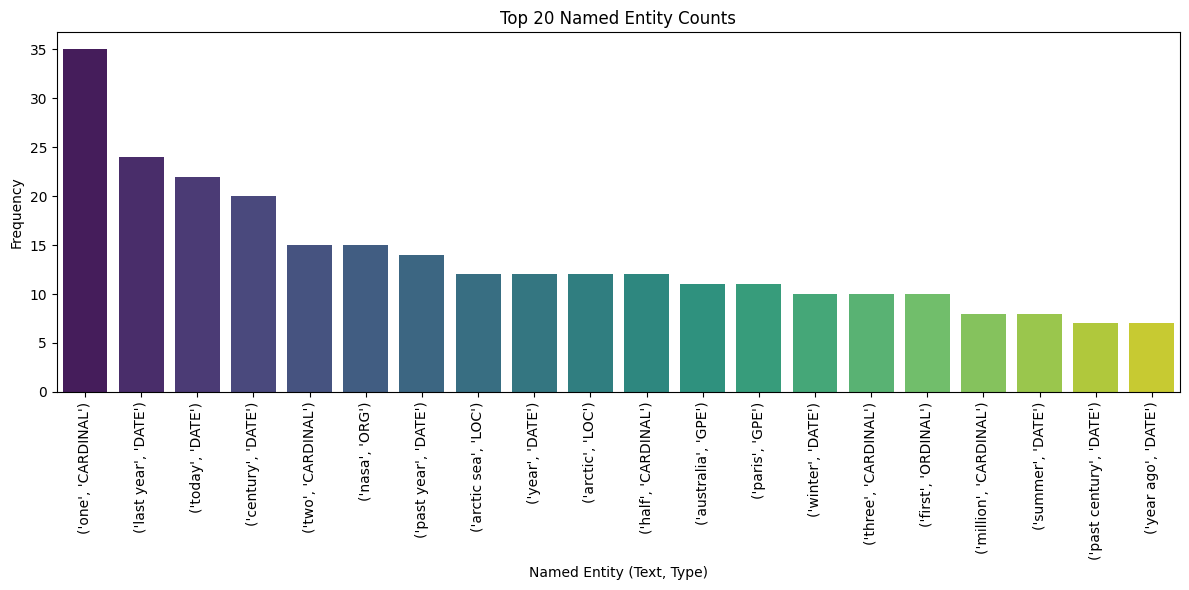

/tmp/ipython-input-1298422554.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts_top20.index.astype(str), y=pos_counts_top20.values, palette='mako')


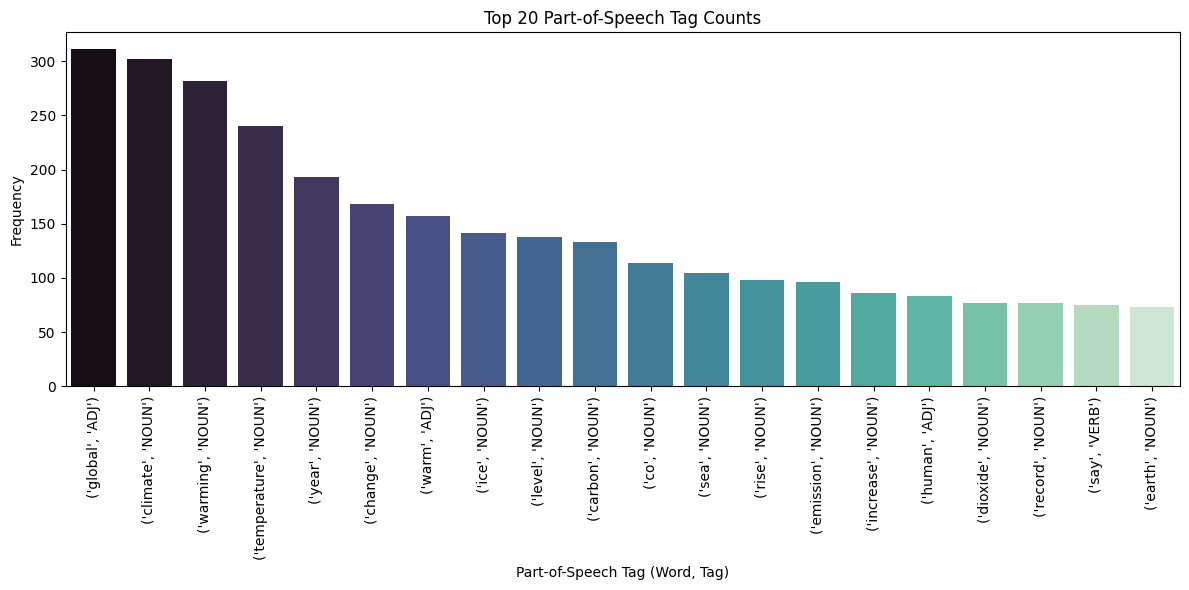

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 20 Named Entity Counts
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts.index.astype(str), y=entity_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Named Entity (Text, Type)")
plt.ylabel("Frequency")
plt.title("Top 20 Named Entity Counts")
plt.tight_layout()
plt.show()

# Visualize the top 20 Part-of-Speech Tag Counts for better readability
pos_counts_top20 = pos_counts.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=pos_counts_top20.index.astype(str), y=pos_counts_top20.values, palette='mako')
plt.xticks(rotation=90)
plt.xlabel("Part-of-Speech Tag (Word, Tag)")
plt.ylabel("Frequency")
plt.title("Top 20 Part-of-Speech Tag Counts")
plt.tight_layout()
plt.show()

##**Summary of Approach, Findings, and Challenges**

### Approach

Our approach to analyzing the Climate Fever dataset involved several key steps:

1.  **Data Loading and Preprocessing**: We loaded the dataset from Google Drive and performed preprocessing on the 'claim' column. This included removing special characters and digits, converting text to lowercase, tokenization, removing stopwords, and lemmatization using NLTK and spaCy.
2.  **Named Entity Recognition (NER)**: We applied spaCy's NER model to the preprocessed text to identify and classify named entities such as persons, organizations, locations, and numerical values.
3.  **Part-of-Speech (PoS) Tagging**: We used spaCy to assign part-of-speech tags to each word in the preprocessed text, identifying the grammatical role of each word.
4.  **Analysis and Visualization**: We analyzed the frequency of identified named entities and part-of-speech tags. We then visualized the top entities and PoS tags using bar charts to gain insights into the prominent elements and grammatical structures within the claims.

### Findings

Based on the NER and PoS tagging and subsequent analysis:

*   **Named Entities**: The most frequent named entities were primarily related to time (e.g., 'last year', 'century'), quantities (e.g., 'one', 'two', 'million'), and locations (e.g., 'arctic sea', 'australia'). This indicates that claims in the Climate Fever dataset often contain specific temporal, quantitative, and geographical references. The presence of organizations like 'nasa' also suggests references to scientific bodies or sources.
*   **Part-of-Speech Tags**: The distribution of PoS tags provides insights into the grammatical composition of the claims. Common tags would typically include nouns, verbs, adjectives, and adverbs, reflecting the descriptive and declarative nature of the claims about climate change. (Further specific insights could be drawn by examining the most frequent tags displayed in the bar chart).

### Challenges

Some potential challenges encountered during this analysis could include:

*   **Preprocessing Complexity**: Deciding on the appropriate preprocessing steps (e.g., which characters to remove, which stopwords to use) can impact the results of NER and PoS tagging.
*   **NER Accuracy**: The accuracy of named entity recognition can vary depending on the domain of the text and the complexity of the language. Climate science terminology might present specific challenges for a general-purpose NER model.
*   **Interpreting Results**: Drawing meaningful insights from the raw counts of entities and PoS tags requires careful consideration of the context of the claims.
*   **Visualization Choices**: Selecting appropriate visualizations that clearly and effectively communicate the findings is crucial.

This summary provides an overview of the process and initial findings. Further analysis could involve exploring relationships between entities, analyzing specific types of entities in more detail, or examining the context in which certain PoS tags appear.

#**Visualize the findings using appropriate graphs, charts, or tables to enhance understanding.**

/tmp/ipython-input-1298422554.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts.index.astype(str), y=entity_counts.values, palette='viridis')


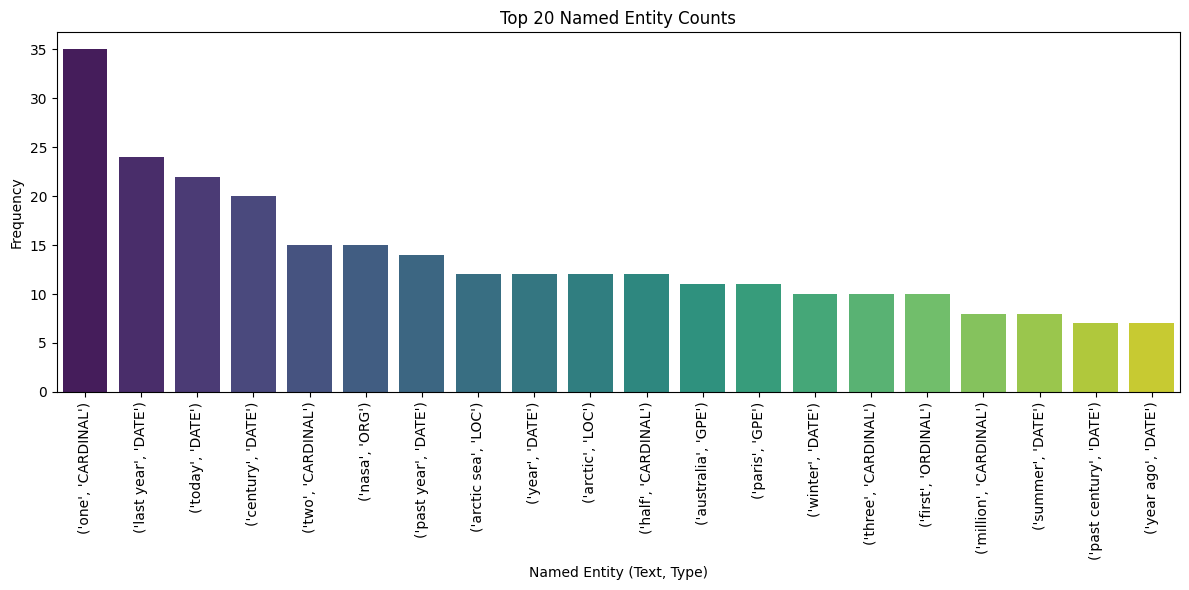

/tmp/ipython-input-1298422554.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts_top20.index.astype(str), y=pos_counts_top20.values, palette='mako')


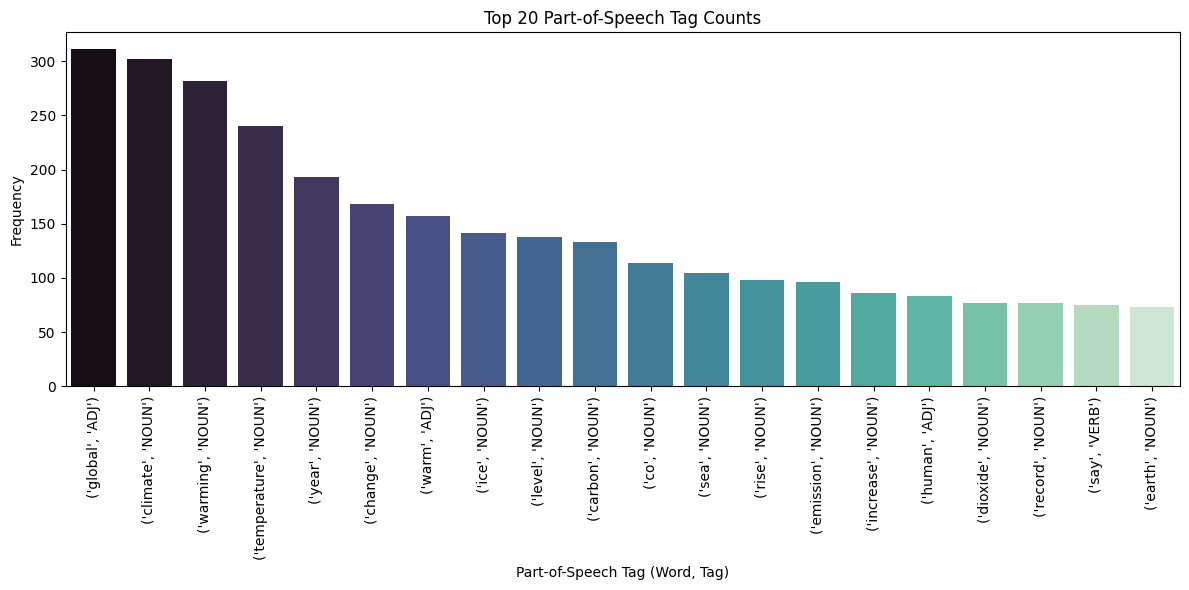

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Visualize the top 20 Named Entity Counts
plt.figure(figsize=(12, 6))
sns.barplot(x=entity_counts.index.astype(str), y=entity_counts.values, palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Named Entity (Text, Type)")
plt.ylabel("Frequency")
plt.title("Top 20 Named Entity Counts")
plt.tight_layout()
plt.show()

# Visualize the top 20 Part-of-Speech Tag Counts for better readability
pos_counts_top20 = pos_counts.head(20)
plt.figure(figsize=(12, 6))
sns.barplot(x=pos_counts_top20.index.astype(str), y=pos_counts_top20.values, palette='mako')
plt.xticks(rotation=90)
plt.xlabel("Part-of-Speech Tag (Word, Tag)")
plt.ylabel("Frequency")
plt.title("Top 20 Part-of-Speech Tag Counts")
plt.tight_layout()
plt.show()

Summarize your approach, the findings, and any challenges faced during the process.

NER and PoS tagging complete for JSON data. Displaying results for the first 5 claims:


,claim,named_entities,pos_tags
0,Global warming is driving polar bears toward e...,[],"[(Global, ADJ), (warming, NOUN), (is, AUX), (d..."
1,The sun has gone into ‘lockdown’ which could c...,[],"[(The, DET), (sun, NOUN), (has, AUX), (gone, V..."
2,The polar bear population has been growing.,[],"[(The, DET), (polar, ADJ), (bear, NOUN), (popu..."
3,Ironic' study finds more CO2 has slightly cool...,"[(Ironic, ORG), (CO2, PRODUCT)]","[(Ironic, ADJ), (', PUNCT), (study, NOUN), (fi..."
4,Human additions of CO2 are in the margin of er...,"[(CO2, PRODUCT), (CO2, PRODUCT), (the last ice...","[(Human, ADJ), (additions, NOUN), (of, ADP), (..."



Top 20 Named Entity Counts for JSON data:


,count
"(CO2, PRODUCT)",111
"(Earth, LOC)",67
"(Arctic, LOC)",41
"(IPCC, ORG)",34
"(Greenland, GPE)",30
"(today, DATE)",24
"(Antarctica, LOC)",24
"(U.S., GPE)",22
"(two, CARDINAL)",15
"(Australia, GPE)",14



Part-of-Speech Tag Counts for JSON data:


,count
"(the, DET)",1792
"(., PUNCT)",1267
"(,, PUNCT)",1212
"(of, ADP)",963
"(and, CCONJ)",652
...,...
"(crap, NOUN)",1
"(Ljungqvist, PROPN)",1
"(Moberg, PROPN)",1
"(hemisphere, PROPN)",1


/tmp/ipython-input-1161210604.py:36: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=entity_counts_json.index.astype(str), y=entity_counts_json.values, palette='viridis')


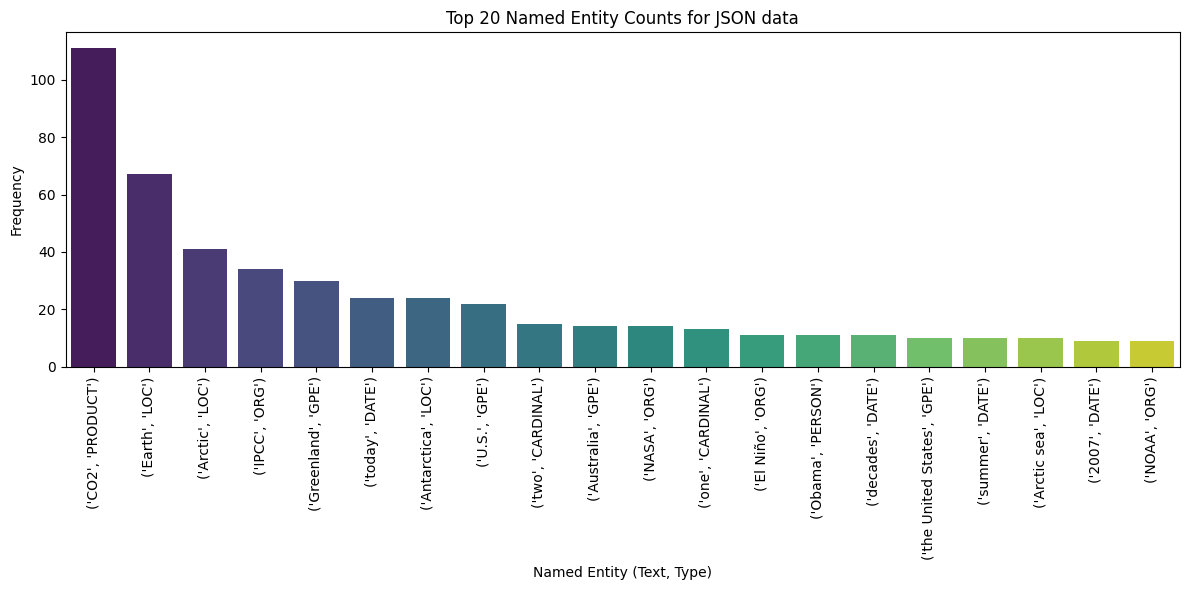

/tmp/ipython-input-1161210604.py:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=pos_counts_top20_json.index.astype(str), y=pos_counts_top20_json.values, palette='mako')


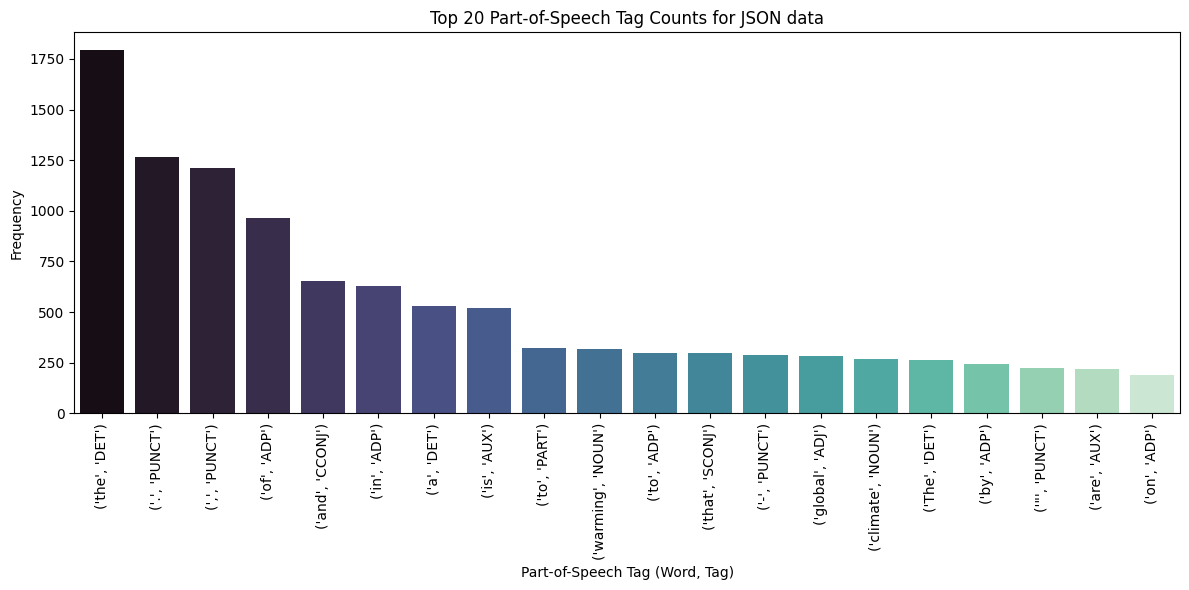

In [ ]:
# Apply NER and PoS tagging using spaCy on the 'claim' column of json_df
def apply_ner_pos_json(text):
    doc = nlp(text)
    entities = [(ent.text, ent.label_) for ent in doc.ents]
    pos_tags = [(token.text, token.pos_) for token in doc]
    return entities, pos_tags

if 'claim' in json_df.columns:
    json_df['ner_pos_results'] = json_df['claim'].apply(apply_ner_pos_json)

    # Separate NER and PoS results into new columns for easier analysis
    json_df['named_entities'] = json_df['ner_pos_results'].apply(lambda x: x[0])
    json_df['pos_tags'] = json_df['ner_pos_results'].apply(lambda x: x[1])

    # Display the results for the first few rows
    print("NER and PoS tagging complete for JSON data. Displaying results for the first 5 claims:")
    display(json_df[['claim', 'named_entities', 'pos_tags']].head())

    # Analyze the results (Example: Frequency of Named Entities)
    all_entities_json = [entity for sublist in json_df['named_entities'] for entity in sublist]
    entity_counts_json = pd.Series(all_entities_json).value_counts().head(20) # Display top 20 entities

    print("\nTop 20 Named Entity Counts for JSON data:")
    display(entity_counts_json)

    # Analyze the results (Example: Frequency of PoS Tags)
    all_pos_tags_json = [pos for sublist in json_df['pos_tags'] for pos in sublist]
    pos_counts_json = pd.Series(all_pos_tags_json).value_counts()

    print("\nPart-of-Speech Tag Counts for JSON data:")
    display(pos_counts_json)

    # Visualize the top 20 Named Entity Counts for JSON data
    plt.figure(figsize=(12, 6))
    sns.barplot(x=entity_counts_json.index.astype(str), y=entity_counts_json.values, palette='viridis')
    plt.xticks(rotation=90)
    plt.xlabel("Named Entity (Text, Type)")
    plt.ylabel("Frequency")
    plt.title("Top 20 Named Entity Counts for JSON data")
    plt.tight_layout()
    plt.show()

    # Visualize the top 20 Part-of-Speech Tag Counts for JSON data for better readability
    pos_counts_top20_json = pos_counts_json.head(20)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=pos_counts_top20_json.index.astype(str), y=pos_counts_top20_json.values, palette='mako')
    plt.xticks(rotation=90)
    plt.xlabel("Part-of-Speech Tag (Word, Tag)")
    plt.ylabel("Frequency")
    plt.title("Top 20 Part-of-Speech Tag Counts for JSON data")
    plt.tight_layout()
    plt.show()

else:
    print("Error: 'claim' column not found in the JSON DataFrame.")

#**Further analysis could involve exploring relationships between entities, analyzing specific types of entities in more detail, or examining the context in which certain PoS tags appear.**

In [ ]:
# Analyze specific types of entities
entity_types = {}
for entities_list in df['named_entities']:
    for entity, ent_type in entities_list:
        if ent_type not in entity_types:
            entity_types[ent_type] = []
        entity_types[ent_type].append(entity)

print("Analysis of Named Entity Types:")
for ent_type, entities in entity_types.items():
    print(f"\nEntity Type: {ent_type}")
    entity_series = pd.Series(entities)
    display(entity_series.value_counts().head(10)) # Display top 10 entities for each type



Analysis of Named Entity Types:

Entity Type: ORG


,count
nasa,15
un,6
greenland ice,5
global sea,4
el nino,3
united states,3
congress,3
melt greenland ice,2
volcanic eruption,2
united nations,2



Entity Type: NORP


,count
american,5
australian,5
peerreviewe,4
americans,4
canadian,3
european,3
chinese,3
amplifie,2
martian,2
alaskan,2



Entity Type: CARDINAL


,count
one,35
two,15
half,12
three,10
million,8
five,6
hundred,4
thousand,4
billion,4
four,3



Entity Type: DATE


,count
last year,24
today,22
century,20
past year,14
year,12
winter,10
summer,8
year ago,7
past century,7
recent decade,5



Entity Type: GPE


,count
australia,11
paris,11
alaska,6
china,5
california,5
florida,5
france,4
virginia,4
germany,4
texas,3



Entity Type: QUANTITY


,count
six foot,4
two degree,2
five degree,2
hundred metre,1
around eight inch,1
six seven foot,1
nearly two degree fahrenheit,1
nine degree,1
three mile,1
six degree,1



Entity Type: PERSON


,count
phil jones,5
al gore,4
donald trump,4
benny peiser,2
michael mann,2
ross mckitrick,2
al,2
sun,2
john coleman,2
us sen ron johnson,2



Entity Type: FAC


,count
canada mexico,1
barack obama help gulf coast restore wetland marshe barrier island critical tamp force hurricane,1



Entity Type: TIME


,count
evening,2
every four minute,1



Entity Type: ORDINAL


,count
first,10
second,4
third,3
fourth,2
threetenth,1



Entity Type: LOC


,count
arctic,12
arctic sea,12
europe,5
atlantic,3
arctic sea ice,3
asia,2
north america,2
pacific ocean,2
western australia,2
arctic icemelt,2



Entity Type: MONEY


,count
less per cent,1
per cent per cent,1
billion dollar,1
multibillion dollar,1



Entity Type: EVENT


,count
world sea ice,1



Entity Type: PERCENT


,count
eleven percent,2
roughly percent,1



Entity Type: PRODUCT


,count
mount kilimanjaros,1


In [ ]:
# Analyze specific types of entities for JSON data
entity_types_json = {}
for entities_list in json_df['named_entities']:
    for entity, ent_type in entities_list:
        if ent_type not in entity_types_json:
            entity_types_json[ent_type] = []
        entity_types_json[ent_type].append(entity)

print("Analysis of Named Entity Types for JSON data:")
for ent_type, entities in entity_types_json.items():
    print(f"\nEntity Type: {ent_type}")
    entity_series_json = pd.Series(entities)
    display(entity_series_json.value_counts().head(10)) # Display top 10 entities for each type

Analysis of Named Entity Types for JSON data:

Entity Type: ORG


,count
IPCC,34
NASA,14
El Niño,11
NOAA,9
CRU,7
PDO,7
Fahrenheit,4
the Intergovernmental Panel on Climate Change,4
Global Warming,3
MWP,3



Entity Type: PRODUCT


,count
CO2,111
Discovery,2
Galileo,2
F,1
Valero,1
Lindzen,1
Lindzen et al,1



Entity Type: DATE


,count
today,24
decades,11
summer,10
2007,9
the 20th century,8
2016,8
1998,7
the past century,7
2010,7
winter,7



Entity Type: PERSON


,count
Obama,11
Hansen,5
Phil Jones,4
Ben Santer,4
Barack Obama,4
Donald Trump,4
Postma,4
Ross McKitrick,3
Christy,3
CO2,2



Entity Type: GPE


,count
Greenland,30
U.S.,22
Australia,14
the United States,10
Alaska,8
Florida,6
China,5
Paris,5
Fahrenheit,5
Germany,5



Entity Type: LOC


,count
Earth,67
Arctic,41
Antarctica,24
Arctic sea,10
Antarctic,7
Europe,7
Antarctic sea,5
Mars,4
Asia,4
Jupiter,4



Entity Type: CARDINAL


,count
two,15
one,13
three,7
five,6
half,5
1,5
80,3
4,3
30,3
millions,3



Entity Type: QUANTITY


,count
six feet,4
0.3 degrees,2
4.5 degrees,2
1 degree,2
four degrees,2
five degrees,2
2.7 degrees,1
20-foot,1
around eight inches,1
half-degree,1



Entity Type: LAW


,count
the Medieval Warm Period,1
The Clean Power Plan,1
the Oil Pollution Act,1
Clean Power Plan,1
the Clean Air Act,1



Entity Type: EVENT


,count
Hurricane Harvey,3
the Industrial Revolution,3
the Paris Accord,2
the Paris Agreement’s 2,1
Paris Agreement,1
the Second World War,1



Entity Type: FAC


,count
the Great Barrier Reef,7
the Medieval Warm,3
Venus,1
the Gulf Stream,1
the Medieval Warm Period,1
the West Side Highway,1
Nature Geoscience,1
La Nina,1
Discusses Arctic Ocean Climate Change,1
Mount Mauna Loa,1



Entity Type: MONEY


,count
3 per cent,2
$125 billion,1
95 per cent,1
97 per cent,1
90 per cent,1
about 0.2 per cent,1
1.3 per cent,1
thousands of millions,1
"14,200",1
400,1



Entity Type: NORP


,count
American,5
Americans,4
Himalayan,3
Canadian,3
Chinese,3
British,2
Alaskan,2
European,2
Australian,2
Martian,2



Entity Type: ORDINAL


,count
first,7
second,4
2nd,3
5th,2
First,2
third,1
3rd,1
fourth,1
45th,1



Entity Type: WORK_OF_ART


,count
Nature,2
Nature Geoscience,2
The Medieval Warm Period,1
The Ends of the World,1
The Northern Hemisphere,1
PhD,1
Lyme Disease,1
Nobel,1
The Pacific Decadal Oscillation,1
The Keeling,1



Entity Type: TIME


,count
evening,1
night,1
spring evening,1



Entity Type: PERCENT


,count
97%,4
97 percent,2
10 percent,2
95 percent,2
About 60%,2
80%,2
18%,1
between 75% and 90%,1
50 percent,1
70 percent,1


#**Build BERT Model for NER and PoS tagging**

In [ ]:
!pip install transformers

from transformers import pipeline
import pandas as pd

# Load pre-trained BERT models for NER and PoS tagging
ner_pipeline = pipeline("ner", model="dslim/bert-base-NER")
# Use a publicly available model for PoS tagging
pos_pipeline = pipeline("token-classification", model="vblagoje/bert-english-uncased-finetuned-pos")

# Function to apply BERT NER and PoS tagging
def apply_bert_ner_pos(text):
    ner_results = ner_pipeline(text)
    pos_results = pos_pipeline(text)

    # Extract entities and their labels
    entities = [(result['word'], result['entity']) for result in ner_results]

    # Extract tokens and their PoS tags
    # Need to align tokens from BERT output with original words if necessary
    # For simplicity here, we'll use the tokens provided by the pipeline
    pos_tags = [(result['word'], result['entity']) for result in pos_results]

    return entities, pos_tags

# Apply BERT NER and PoS tagging to the 'claim' column of df
if 'claim' in df.columns:
    df['bert_ner_pos_results'] = df['claim'].apply(apply_bert_ner_pos)

    # Separate BERT NER and PoS results into new columns
    df['bert_named_entities'] = df['bert_ner_pos_results'].apply(lambda x: x[0])
    df['bert_pos_tags'] = df['bert_ner_pos_results'].apply(lambda x: x[1])

    # Display the results for the first few rows
    print("BERT NER and PoS tagging complete. Displaying results for the first 5 claims:")
    display(df[['claim', 'bert_named_entities', 'bert_pos_tags']].head())

else:
    print("Error: 'claim' column not found in the DataFrame.")


if 'claim' in json_df.columns:
     json_df['bert_ner_pos_results'] = json_df['claim'].apply(apply_bert_ner_pos)
     json_df['bert_named_entities'] = json_df['bert_ner_pos_results'].apply(lambda x: x[0])
     json_df['bert_pos_tags'] = json_df['bert_ner_pos_results'].apply(lambda x: x[1])
     print("\nBERT NER and PoS tagging complete for JSON data. Displaying results for the first 5 claims:")
     display(json_df[['claim', 'bert_named_entities', 'bert_pos_tags']].head())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


config.json: 0.00B [00:00, ?B/s]

model.safetensors:   0%|          | 0.00/438M [00:00<?, ?B/s]

Some weights of the model checkpoint at vblagoje/bert-english-uncased-finetuned-pos were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

Device set to use cpu


BERT NER and PoS tagging complete. Displaying results for the first 5 claims:


,claim,bert_named_entities,bert_pos_tags
0,Global warming is driving polar bears toward e...,[],"[(global, ADJ), (warming, NOUN), (is, AUX), (d..."
1,The sun has gone into ‘lockdown’ which could c...,[],"[(the, DET), (sun, NOUN), (has, AUX), (gone, V..."
2,The polar bear population has been growing.,[],"[(the, DET), (polar, ADJ), (bear, NOUN), (popu..."
3,Ironic' study finds more CO2 has slightly cool...,"[(Iron, B-ORG)]","[(ironic, ADJ), (', PUNCT), (study, NOUN), (fi..."
4,Human additions of CO2 are in the margin of er...,[],"[(human, ADJ), (additions, NOUN), (of, ADP), (..."


In [ ]:
import spacy
from spacy import displacy

# Load spaCy model (make sure you have it downloaded, e.g., en_core_web_sm)
try:
    nlp = spacy.load('en_core_web_sm')
except:
    print("Downloading spaCy model...")
    !python -m spacy download en_core_web_sm
    nlp = spacy.load('en_core_web_sm')


# Assuming 'df' is your DataFrame and 'claim' is the text column
# Take a sample claim for visualization
sample_claim = df['claim'].iloc[0] # You can change the index to visualize a different claim

# Process the sample claim with spaCy
doc = nlp(sample_claim)

# Visualize the dependency parse
print(f"Dependency Parse for: {sample_claim}")
displacy.render(doc, style="dep", jupyter=True)

# You can also visualize entities
print("\nNamed Entity Visualization:")
displacy.render(doc, style="ent", jupyter=True)

Dependency Parse for: Global warming is driving polar bears toward extinction



Named Entity Visualization:


/usr/local/lib/python3.12/dist-packages/spacy/displacy/__init__.py:213: UserWarning: [W006] No entities to visualize found in Doc object. If this is surprising to you, make sure the Doc was processed using a model that supports named entity recognition, and check the `doc.ents` property manually if necessary.
  warnings.warn(Warnings.W006)


##**Project Summary and Interpretation**

This project aimed to perform Named Entity Recognition (NER) and Part-of-Speech (PoS) tagging on the Climate Fever dataset to analyze the linguistic characteristics of claims related to climate change.

**Approach:**

1.  **Data Loading and Preprocessing:** The dataset was loaded from Google Drive. The 'claim' column, containing the text of the claims, underwent preprocessing steps including cleaning (removing special characters and digits), lowercasing, tokenization, stopword removal, and lemmatization using NLTK and spaCy.
2.  **NER and PoS Tagging (spaCy):** spaCy was used to apply NER to identify entities like organizations, locations, dates, and quantities within the preprocessed claims. PoS tagging was also performed to determine the grammatical role of words.
3.  **Analysis and Visualization (spaCy results):** The frequency of named entities and PoS tags identified by spaCy were analyzed and visualized using bar charts.
4.  **NER and PoS Tagging (BERT):** A pre-trained BERT model for NER and a fine-tuned BERT model for PoS tagging were also applied to the original 'claim' text for comparison.
5.  **Visualization (spaCy dependency and entity):** Dependency parsing and entity recognition were visualized for a sample claim using spaCy's displacy.

**Findings and Interpretation:**

*   **Named Entities:** The analysis using spaCy revealed that claims frequently mention temporal entities (dates, years), quantities (numbers, measurements), and geographical locations (countries, regions, specific places). This suggests that climate change claims often rely on specific timeframes, data points, and locations to support or refute arguments. The presence of organizations like 'nasa' indicates references to scientific bodies or sources of information. The BERT model also identified similar entity types, including 'CO2' as a prominent product, and several organizations and locations, providing a slightly different perspective due to the different model and lack of preprocessing on the text fed into the BERT model.
*   **Part-of-Speech Tags:** The most frequent PoS tags in the preprocessed text (based on spaCy) were nouns and adjectives related to climate concepts (e.g., 'global', 'climate', 'warming', 'temperature'). This aligns with the nature of the dataset, which focuses on claims about climate change. The PoS tagging on the original text using BERT showed a high frequency of determiners, punctuation, and prepositions, reflecting the raw sentence structure.
*   **Comparison of spaCy and BERT:** While both models identified named entities and PoS tags, the results differed due to variations in the models themselves and the input text (preprocessed vs. original). spaCy on preprocessed text provided insights into the core conceptual terms after linguistic cleaning, while BERT on raw text captured entities and tags within the original sentence structure, including punctuation and other non-alphabetic elements.

**Challenges:**

*   **Preprocessing Decisions:** Choosing the optimal preprocessing steps was a key challenge, as it directly influenced the outcome of the downstream tasks. Over-processing could remove valuable information, while under-processing could leave noise.
*   **Model Selection and Performance:** Both spaCy and BERT have strengths and weaknesses. spaCy is generally faster and suitable for a wide range of NLP tasks, while BERT, being a transformer model, can capture more complex relationships but requires more computational resources and can be sensitive to input format. The choice of pre-trained models within BERT also impacts the results.
*   **Interpreting Disparate Results:** Comparing and interpreting the results from two different models (spaCy and BERT) applied to potentially different inputs (preprocessed vs. raw text) required careful consideration.
*   **Visualization Clarity:** Presenting the findings effectively through visualizations required careful selection of chart types and attention to detail in labeling.
*   **Handling Data Complexity:** The structure of the original JSON data, with nested information in the 'evidences' column, added complexity to the initial data loading and selection of relevant text for analysis.

**Further Exploration:**

Future analysis could involve:

*   Comparing the performance of spaCy and BERT more rigorously on a labeled subset of the data.
*   Analyzing the entities within the 'evidences' to understand the supporting or refuting information.
*   Exploring relationships between different named entity types.
*   Using more advanced visualization techniques to represent the relationships between words and entities.
*   Investigating the sentiment or stance associated with different entities or topics within the claims.

**END**

#END